In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from heapq import nlargest
import scipy.stats

In [3]:
df = pd.read_csv('task_history.csv')

In [4]:
df

,task_id,start_time,finish_time,status,worker,build_name,author,project
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary
...,...,...,...,...,...,...,...,...
162854,225841,2005-07-17 20:34:53.562,2005-07-17 21:22:55.810,success,worker_79,deploy_green_data,Bendy Python,Mud Runner
162855,13401,2005-07-17 20:34:53.765,2005-07-17 21:14:50.274,success,worker_85,deploy_green_data,Bendy Python,Mud Runner
162856,13403,2005-07-17 21:22:56.247,2005-07-17 21:47:21.805,success,worker_1e,deploy_green_data,Bendy Python,Mud Runner
162857,225842,2005-07-17 23:03:35.688,2005-07-17 23:46:23.162,success,worker_23,deploy_green_data,Bendy Python,Mud Runner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162859 entries, 0 to 162858
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   task_id      162859 non-null  int64 
 1   start_time   162859 non-null  object
 2   finish_time  162859 non-null  object
 3   status       162859 non-null  object
 4   worker       162859 non-null  object
 5   build_name   162859 non-null  object
 6   author       162859 non-null  object
 7   project      162859 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.9+ MB


In [6]:
df['task_id'] = df['task_id'].astype('str')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162859 entries, 0 to 162858
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   task_id      162859 non-null  object
 1   start_time   162859 non-null  object
 2   finish_time  162859 non-null  object
 3   status       162859 non-null  object
 4   worker       162859 non-null  object
 5   build_name   162859 non-null  object
 6   author       162859 non-null  object
 7   project      162859 non-null  object
dtypes: object(8)
memory usage: 9.9+ MB


#### Для каждой недели распечатайте топ-3 пользователей, потребивших наибольшее количество машиночасов. Выведите для данных пользователей процент потребленных ресурсов от общего объема расчетов за эту неделю.

Преобразую в формат времени столбцы со временем:

In [8]:
df['start_time'] = pd.to_datetime(df['start_time']).dt.tz_localize(None)
df['finish_time'] = pd.to_datetime(df['finish_time']).dt.tz_localize(None)

Сделаю столбец с временем выполнения таски

In [9]:
df['exec_time'] = df['finish_time']-df['start_time']

In [10]:
df.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,exec_time
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.281000
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.297000
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:13.856000
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:04:25.461000
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:02:29.058000


Посмотрю на максимальные значения времени выполнения таски по неделям

In [11]:
df.groupby(pd.Grouper(key='start_time', freq='W-MON')).max()

,task_id,finish_time,status,worker,build_name,author,project,exec_time
start_time,,,,,,,,
2005-06-20,115153,2005-06-21 04:16:02.472,success,worker_66,validate_yellow_sound,Polly Xi,World War Z,0 days 07:08:15.527000
2005-06-27,99999,2005-06-28 10:14:51.810,success,worker_70,validate_yellow_sound,Polly Xi,World War Z,0 days 20:27:04.343000
2005-07-04,9997,2005-07-05 04:39:15.673,success,worker_8d,validate_yellow_sound,Polly Xi,World War Z,1 days 05:13:42.666000
2005-07-11,99993,2005-07-12 04:10:03.379,success,worker_8c,validate_yellow_sound,Polly Xi,World War Z,2 days 03:00:12.935000
2005-07-18,9999,2005-07-18 03:03:11.856,success,worker_8b,validate_yellow_sound,Polly Xi,World War Z,0 days 11:17:56.515000


In [12]:
df.groupby(pd.Grouper(key='finish_time', freq='W-MON')).max()

,task_id,start_time,status,worker,build_name,author,project,exec_time
finish_time,,,,,,,,
2005-06-20,115153,2005-06-20 23:58:12.815,success,worker_66,validate_yellow_sound,Polly Xi,World War Z,0 days 04:16:59.404000
2005-06-27,99999,2005-06-27 23:56:11.382,success,worker_70,validate_yellow_sound,Polly Xi,World War Z,0 days 18:26:00.873000
2005-07-04,9997,2005-07-04 23:30:12.225,success,worker_8d,validate_yellow_sound,Polly Xi,World War Z,1 days 05:13:42.666000
2005-07-11,99993,2005-07-11 23:59:15.793,success,worker_8c,validate_yellow_sound,Polly Xi,World War Z,2 days 03:00:12.935000
2005-07-18,9999,2005-07-17 23:58:49.596,success,worker_8b,validate_yellow_sound,Polly Xi,World War Z,0 days 11:17:56.515000


In [13]:
df_top3_weekly = df.groupby([pd.Grouper(key='start_time', freq='W-MON')])['exec_time'].nlargest(3)\
                   .to_frame()\
                   .reset_index()\
                   .drop(columns='level_1')\
                   .rename(columns={'start_time':'first_week_day'})

In [14]:
df_top3_weekly

,first_week_day,exec_time
0,2005-06-20,0 days 07:08:15.527000
1,2005-06-20,0 days 04:16:59.404000
2,2005-06-20,0 days 04:16:53.708000
3,2005-06-27,0 days 20:27:04.343000
4,2005-06-27,0 days 18:26:00.873000
5,2005-06-27,0 days 17:13:04.766000
6,2005-07-04,1 days 05:13:42.666000
7,2005-07-04,0 days 17:58:00.424000
8,2005-07-04,0 days 17:55:38.039000
9,2005-07-11,2 days 03:00:12.935000


In [15]:
df_merged = df_top3_weekly.merge(df, on='exec_time')[['first_week_day', 'worker', 'exec_time']]

In [16]:
df_merged

,first_week_day,worker,exec_time
0,2005-06-20,worker_23,0 days 07:08:15.527000
1,2005-06-20,worker_55,0 days 04:16:59.404000
2,2005-06-20,worker_50,0 days 04:16:53.708000
3,2005-06-27,worker_07,0 days 20:27:04.343000
4,2005-06-27,worker_36,0 days 18:26:00.873000
5,2005-06-27,worker_11,0 days 17:13:04.766000
6,2005-07-04,worker_29,1 days 05:13:42.666000
7,2005-07-04,worker_50,0 days 17:58:00.424000
8,2005-07-04,worker_46,0 days 17:55:38.039000
9,2005-07-11,worker_55,2 days 03:00:12.935000


In [17]:
df.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,exec_time
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.281000
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.297000
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:13.856000
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:04:25.461000
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:02:29.058000


In [18]:
df_full_weekly = df.groupby([pd.Grouper(key='start_time', freq='W-MON')])['exec_time'].sum()\
                   .to_frame()\
                   .reset_index()\
                   .rename(columns={'start_time':'first_week_day',
                                    'exec_time':'weekly_exec_time'})

In [19]:
df_full_weekly

,first_week_day,weekly_exec_time
0,2005-06-20,35 days 07:46:44.311000
1,2005-06-27,416 days 08:26:57.456000
2,2005-07-04,516 days 04:33:09.339000
3,2005-07-11,432 days 23:50:44.215000
4,2005-07-18,331 days 18:49:32.790000


In [20]:
df_done = df_full_weekly.merge(df_merged, on='first_week_day', how='inner')

In [21]:
df_done

,first_week_day,weekly_exec_time,worker,exec_time
0,2005-06-20,35 days 07:46:44.311000,worker_23,0 days 07:08:15.527000
1,2005-06-20,35 days 07:46:44.311000,worker_55,0 days 04:16:59.404000
2,2005-06-20,35 days 07:46:44.311000,worker_50,0 days 04:16:53.708000
3,2005-06-27,416 days 08:26:57.456000,worker_07,0 days 20:27:04.343000
4,2005-06-27,416 days 08:26:57.456000,worker_36,0 days 18:26:00.873000
5,2005-06-27,416 days 08:26:57.456000,worker_11,0 days 17:13:04.766000
6,2005-07-04,516 days 04:33:09.339000,worker_29,1 days 05:13:42.666000
7,2005-07-04,516 days 04:33:09.339000,worker_50,0 days 17:58:00.424000
8,2005-07-04,516 days 04:33:09.339000,worker_46,0 days 17:55:38.039000
9,2005-07-11,432 days 23:50:44.215000,worker_55,2 days 03:00:12.935000


In [22]:
df_done['percent'] = (df_done['exec_time']/df_done['weekly_exec_time'])*100

In [23]:
df_done

,first_week_day,weekly_exec_time,worker,exec_time,percent
0,2005-06-20,35 days 07:46:44.311000,worker_23,0 days 07:08:15.527000,0.841923
1,2005-06-20,35 days 07:46:44.311000,worker_55,0 days 04:16:59.404000,0.505222
2,2005-06-20,35 days 07:46:44.311000,worker_50,0 days 04:16:53.708000,0.505036
3,2005-06-27,416 days 08:26:57.456000,worker_07,0 days 20:27:04.343000,0.204667
4,2005-06-27,416 days 08:26:57.456000,worker_36,0 days 18:26:00.873000,0.184475
5,2005-06-27,416 days 08:26:57.456000,worker_11,0 days 17:13:04.766000,0.172310
6,2005-07-04,516 days 04:33:09.339000,worker_29,1 days 05:13:42.666000,0.235932
7,2005-07-04,516 days 04:33:09.339000,worker_50,0 days 17:58:00.424000,0.145027
8,2005-07-04,516 days 04:33:09.339000,worker_46,0 days 17:55:38.039000,0.144708
9,2005-07-11,432 days 23:50:44.215000,worker_55,2 days 03:00:12.935000,0.490804


#### Отобразите график с ежедневным потреблением машинного времени каждым проектом.

In [24]:
df.groupby([pd.Grouper(key='start_time', freq='D')])['exec_time'].sum()\
                   .to_frame()\
                   .reset_index()\
                   .rename(columns={'start_time':'first_week_day',
                                    'exec_time':'daily_exec_time'})

,first_week_day,daily_exec_time
0,2005-06-20,35 days 07:46:44.311000
1,2005-06-21,48 days 06:14:40.855000
2,2005-06-22,58 days 22:59:15.207000
3,2005-06-23,60 days 03:27:31.876000
4,2005-06-24,64 days 05:57:13.093000
5,2005-06-25,56 days 01:32:36.349000
6,2005-06-26,55 days 02:07:31.325000
7,2005-06-27,73 days 14:08:08.751000
8,2005-06-28,73 days 13:58:47.396000
9,2005-06-29,74 days 22:52:46.462000


In [25]:
df_daily_by_prjct = df.groupby([pd.Grouper(key='start_time', freq='D'), 'project'])['exec_time'].sum()\
                        .reset_index()\
                        .rename(columns={'start_time':'day'})

In [26]:
df_daily_by_prjct

,day,project,exec_time
0,2005-06-20,Halo Anniversary,1 days 03:40:33.074000
1,2005-06-20,Mud Runner,8 days 11:36:55.307000
2,2005-06-20,Quake Champions,3 days 07:32:01.192000
3,2005-06-20,Timeshift,16 days 02:31:50.384000
4,2005-06-20,World War Z,6 days 06:25:24.354000
...,...,...,...
135,2005-07-17,Halo Anniversary,1 days 17:42:19.103000
136,2005-07-17,Mud Runner,10 days 16:24:47.935000
137,2005-07-17,Quake Champions,3 days 03:01:23.476000
138,2005-07-17,Timeshift,38 days 15:23:44.185000


In [27]:
df_daily_by_prjct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   day        140 non-null    datetime64[ns] 
 1   project    140 non-null    object         
 2   exec_time  140 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), object(1), timedelta64[ns](1)
memory usage: 3.4+ KB


In [28]:
df_daily_by_prjct['minutes'] = df_daily_by_prjct['exec_time']/pd.Timedelta(minutes=1)

In [29]:
df_daily_by_prjct.head()

,day,project,exec_time,minutes
0,2005-06-20,Halo Anniversary,1 days 03:40:33.074000,1660.551233
1,2005-06-20,Mud Runner,8 days 11:36:55.307000,12216.921783
2,2005-06-20,Quake Champions,3 days 07:32:01.192000,4772.019867
3,2005-06-20,Timeshift,16 days 02:31:50.384000,23191.839733
4,2005-06-20,World War Z,6 days 06:25:24.354000,9025.405900


In [30]:
ticklabels = df_daily_by_prjct['day'].dt.strftime('%Y %m %d').unique()

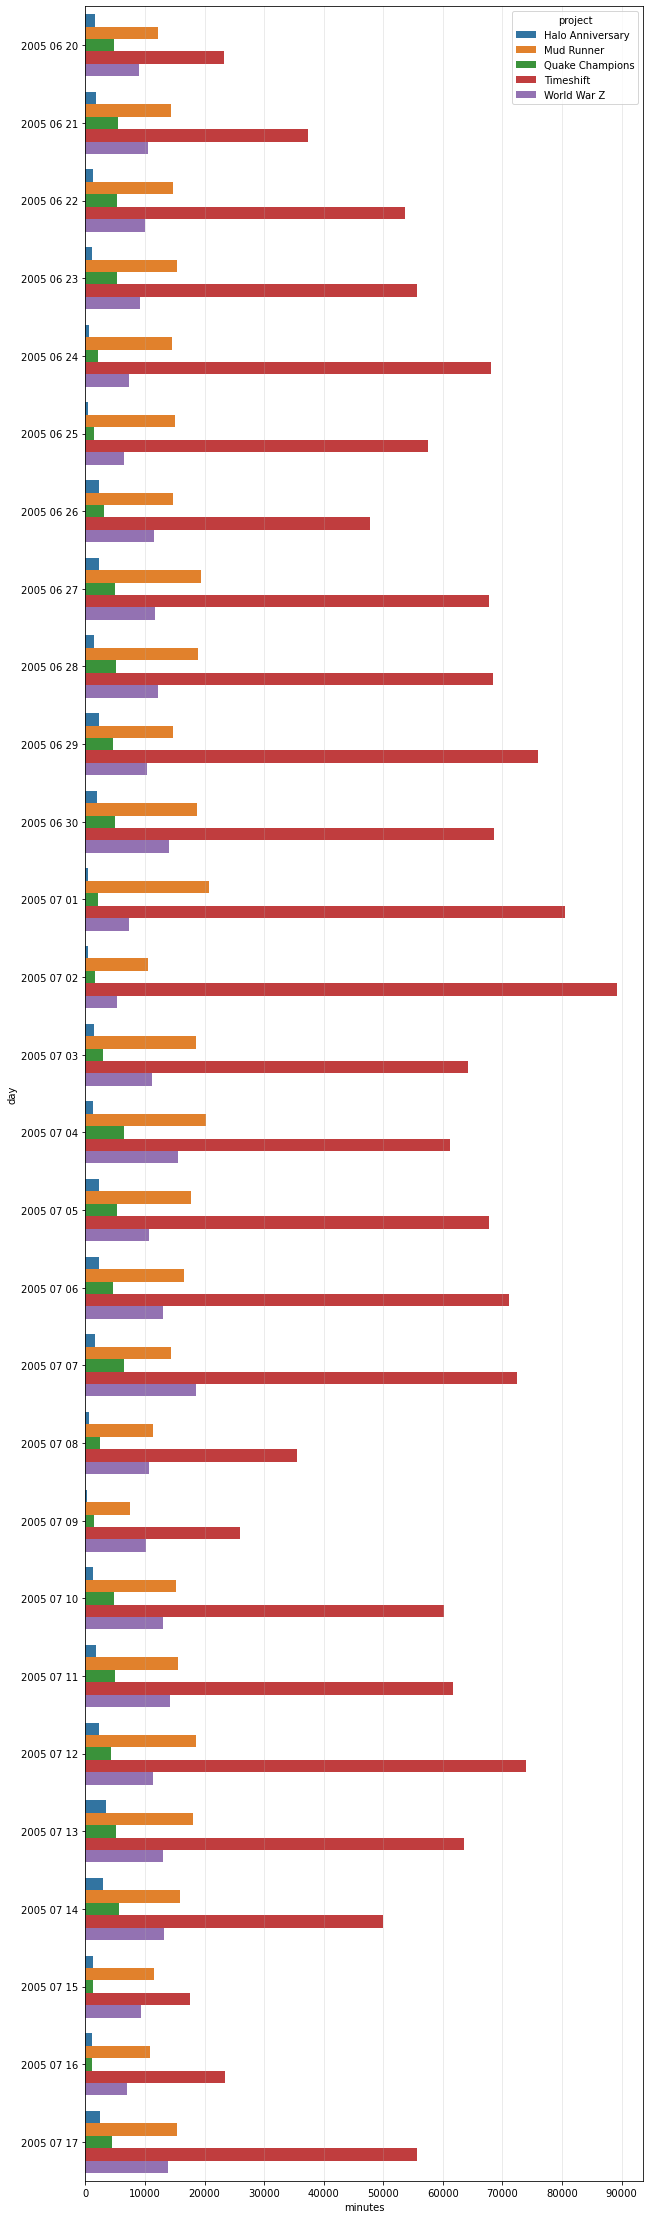

In [31]:
fig, ax = plt.subplots(figsize=(10,40))

sns.barplot(data=df_daily_by_prjct, x='minutes', y='day', hue='project')
plt.xticks(np.arange(0,100000, 10000))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.grid(axis='x', alpha=0.3)

#### Рассмотрим еженедельное общее потребление ресурсов. На второй неделе можно заметить всплеск нагруки с ее последующим планомерным снижением. Проанализируйте и сделайте выводы, с чем связано подобное поведение.

In [32]:
df_full_weekly

,first_week_day,weekly_exec_time
0,2005-06-20,35 days 07:46:44.311000
1,2005-06-27,416 days 08:26:57.456000
2,2005-07-04,516 days 04:33:09.339000
3,2005-07-11,432 days 23:50:44.215000
4,2005-07-18,331 days 18:49:32.790000


В первоначальный датафрейм добавлю время выполнения, выраженное в минутах

In [33]:
df['minutes'] = df['exec_time']/pd.Timedelta(minutes=1)

In [34]:
df.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,exec_time,minutes
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.281000,0.004683
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.297000,0.004950
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:13.856000,0.230933
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:04:25.461000,4.424350
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:02:29.058000,2.484300


Сделаю датафрейм первой недели

In [35]:
df_1st_week = df.loc[df['start_time']<df_full_weekly.iloc[1,0],:]

Второй недели

In [36]:
df_2nd_week = df.loc[(df['start_time']<df_full_weekly.iloc[2,0]) & (df['start_time']>df_full_weekly.iloc[1,0]),:]

Сначала проверю является разница в затраченных ресурсах статистически значимой 

Можно заметить, что диапазон значений минут, затраченных на таску очень большой, поэтому явно будет смещение и большое количество выбросов, поэтому стоит применить непараметрический критерий. Нулевая гипотеза: нет различий в медианных значениях затраченных ресурсов 1 и 2 недели; альфа=0.05

In [37]:
scipy.stats.mannwhitneyu(df_1st_week['minutes'], df_2nd_week['minutes'])

MannwhitneyuResult(statistic=689504349.0, pvalue=5.555931421360357e-38)

P-value меньше уровня значимости, поэтому, медианно есть статистически значимая разница в затраченных ресурсах для 1 и 2 недели

Сначала посмотрю на вообще количество задач, которые были за первую и вторую недели

In [38]:
df_1st_week.shape[0]

37093

In [39]:
df_2nd_week.shape[0]

39293

Проверю среднее время, затраченное на задачу

In [40]:
df_1st_week['exec_time'].mean()

Timedelta('0 days 00:14:40.671097403')

In [41]:
df_2nd_week['exec_time'].mean()

Timedelta('0 days 00:18:57.221216069')

Видно, что вдобавок еще и среднее время выполнения задачи увеличилось. Посмотрю на медианное значение

In [42]:
df_1st_week['exec_time'].median()

Timedelta('0 days 00:03:09.060000')

In [43]:
df_2nd_week['exec_time'].median()

Timedelta('0 days 00:04:41.579000')

Для второй недели мединное значение тоже больше

Самой простой причиной увеличения количества затраченных ресурсов может быть увеличение количества тасок. Посмотрю связь количества затраченных ресурсов относительно каждого проекта с количеством тасок на каждый проект для двух недель

In [44]:
df1_tasks = df_1st_week['project'].value_counts()\
                      .to_frame()\
                      .reset_index()\
                      .rename(columns={'index':'project','project':'num_tasks'})

In [45]:
df1_tasks

,project,num_tasks
0,Timeshift,18604
1,World War Z,6721
2,Mud Runner,6606
3,Halo Anniversary,2592
4,Quake Champions,2570


In [46]:
df2_tasks = df_2nd_week['project'].value_counts()\
                      .to_frame()\
                      .reset_index()\
                      .rename(columns={'index':'project','project':'num_tasks'})

In [47]:
df2_tasks

,project,num_tasks
0,Timeshift,20889
1,World War Z,6850
2,Mud Runner,6482
3,Halo Anniversary,2805
4,Quake Champions,2267


In [48]:
df_tasks = df1_tasks.merge(df2_tasks, on='project', suffixes=('_1w','_2w')).rename(columns={'num_tasks_1w':'1st_week',
                                                                                           'num_tasks_2w':'2nd_week'})

In [49]:
df_tasks

,project,1st_week,2nd_week
0,Timeshift,18604,20889
1,World War Z,6721,6850
2,Mud Runner,6606,6482
3,Halo Anniversary,2592,2805
4,Quake Champions,2570,2267


Можно заметить, что на второй неделе изменилось количество задач на проект. Увеличилось количество тасок на проектах "Timeshift", "World War Z", "Halo Anniversary" и уменьшилось на оставшихся проектах

Посмотрю сколько ресурсов было потрачено на каждый проект в каждую из недель

In [50]:
df1_minutes = df_1st_week.groupby('project')['minutes'].sum().sort_values(ascending=False).to_frame().reset_index()

In [51]:
df1_minutes

,project,minutes
0,Timeshift,343133.611750
1,Mud Runner,100826.571867
2,World War Z,64162.868767
3,Quake Champions,27472.829617
4,Halo Anniversary,8849.668267


In [52]:
df2_minutes = df_2nd_week.groupby('project')['minutes'].sum().sort_values(ascending=False).to_frame().reset_index()

In [53]:
df2_minutes

,project,minutes
0,Timeshift,514581.934717
1,Mud Runner,121480.194383
2,World War Z,72006.902167
3,Quake Champions,26418.287367
4,Halo Anniversary,10259.902083


In [54]:
df_minutes = df1_minutes.merge(df2_minutes, on='project', suffixes=('_1w','_2w')).rename(columns={'minutes_1w':'1st_week',
                                                                                                  'minutes_2w':'2nd_week'})

In [55]:
df_minutes

,project,1st_week,2nd_week
0,Timeshift,343133.611750,514581.934717
1,Mud Runner,100826.571867,121480.194383
2,World War Z,64162.868767,72006.902167
3,Quake Champions,27472.829617,26418.287367
4,Halo Anniversary,8849.668267,10259.902083


Можно заметить, что на все проекты, кроме "Quake Champions" было затрачено во вторую неделю больше ресурсов

Для визуализации применю метод .melt

In [56]:
df_tasks_melted = pd.melt(df_tasks, id_vars='project', value_vars=['1st_week','2nd_week'])\
                    .rename(columns={'variable':'week',
                                    'value':'tasks'})

In [57]:
df_tasks_melted

,project,week,tasks
0,Timeshift,1st_week,18604
1,World War Z,1st_week,6721
2,Mud Runner,1st_week,6606
3,Halo Anniversary,1st_week,2592
4,Quake Champions,1st_week,2570
5,Timeshift,2nd_week,20889
6,World War Z,2nd_week,6850
7,Mud Runner,2nd_week,6482
8,Halo Anniversary,2nd_week,2805
9,Quake Champions,2nd_week,2267


In [58]:
df_minutes_melted = pd.melt(df_minutes, id_vars='project', value_vars=['1st_week','2nd_week'])\
                    .rename(columns={'variable':'week',
                                    'value':'minutes'})

In [59]:
df_minutes_melted

,project,week,minutes
0,Timeshift,1st_week,343133.611750
1,Mud Runner,1st_week,100826.571867
2,World War Z,1st_week,64162.868767
3,Quake Champions,1st_week,27472.829617
4,Halo Anniversary,1st_week,8849.668267
5,Timeshift,2nd_week,514581.934717
6,Mud Runner,2nd_week,121480.194383
7,World War Z,2nd_week,72006.902167
8,Quake Champions,2nd_week,26418.287367
9,Halo Anniversary,2nd_week,10259.902083


<AxesSubplot:xlabel='project', ylabel='tasks'>

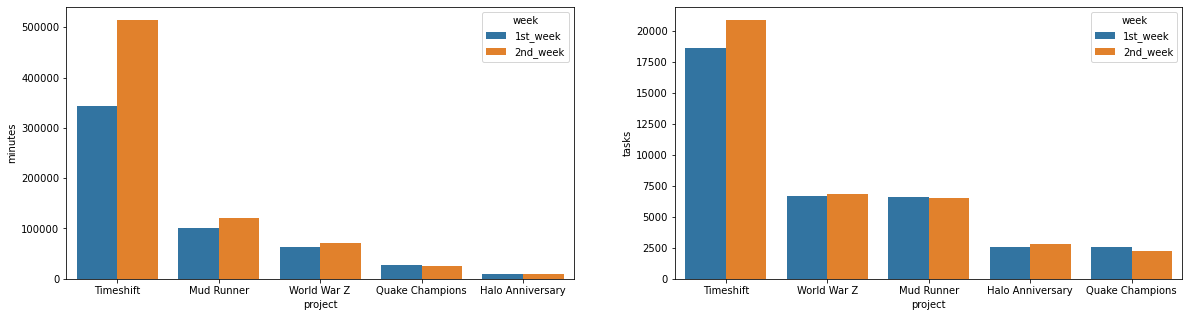

In [60]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.barplot(data=df_minutes_melted, x='project', y='minutes', hue='week', ax=ax[0])
sns.barplot(data=df_tasks_melted, x='project', y='tasks', hue='week', ax=ax[1])

Отсюда можно сделать выводы, что на всех, кроме одного, проектах увеличилось суммарное время выполнения тасок, при том, что само количество тасок осталось почти на всех проектах неизменным. В проекте Quake Champions уменьшилось как количество тасок, так и время выполнения, в проекте Mud Runner увеличилось время выполнения, а количество тасок уменьшилось, в остальных проектах вместе с увеличением количества тасок увеличилось время выполнения, что логично

Проверю является ли разница в количестве затраченных ресурсов статистически значимой для проектов, в которых во вторую неделю увеличилось суммарное значение затраченных ресурсов: Timeshift, Mud Runner, World War Z, Halo Anniversary

In [61]:
minutes_12w_ts = pd.concat([df_1st_week[df_1st_week['project']=='Timeshift']['minutes'], df_2nd_week[df_2nd_week['project']=='Timeshift']['minutes']])\
                   .to_frame()
minutes_12w_md = pd.concat([df_1st_week[df_1st_week['project']=='Mud Runner']['minutes'], df_2nd_week[df_2nd_week['project']=='Mud Runner']['minutes']])\
                   .to_frame()
minutes_12w_wwz = pd.concat([df_1st_week[df_1st_week['project']=='World War Z']['minutes'], df_2nd_week[df_2nd_week['project']=='World War Z']['minutes']])\
                   .to_frame()
minutes_12w_ha = pd.concat([df_1st_week[df_1st_week['project']=='Halo Anniversary']['minutes'], df_2nd_week[df_2nd_week['project']=='Halo Anniversary']['minutes']])\
                   .to_frame()

In [62]:
minutes_12w_ts['project'] = 'Timeshift'
minutes_12w_md['project'] = 'Mud Runner'
minutes_12w_wwz['project'] = 'World War Z'
minutes_12w_ha['project'] = 'Halo Anniversary'

In [63]:
concated_4projects = pd.concat([minutes_12w_ts, minutes_12w_md, minutes_12w_wwz, minutes_12w_ha])

Проверю выбросы

<AxesSubplot:xlabel='project', ylabel='minutes'>

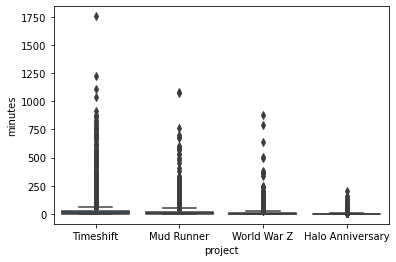

In [64]:
fig, ax = plt.subplots()

sns.boxplot(data=concated_4projects, x='project', y='minutes')

Судя по боксплоту видно, что в данных имеется множество выбросов на каждом проекте, поэтому стоит применить непараметрический критерий для проверки медианных значений. Нулевая гипотеза: нет различий в медианных значениях затраченных ресурсов 1 и 2 недели; альфа = 0.05. Буду использовать гипотезу для всех проектов, где увеличилось суммарное значение затраченных ресурсов

In [65]:
p_value_ts = scipy.stats.mannwhitneyu(df_1st_week[df_1st_week['project']=='Timeshift']['minutes'], df_2nd_week[df_2nd_week['project']=='Timeshift']['minutes'])[1]
p_value_md = scipy.stats.mannwhitneyu(df_1st_week[df_1st_week['project']=='Mud Runner']['minutes'], df_2nd_week[df_2nd_week['project']=='Mud Runner']['minutes'])[1]
p_value_wwz = scipy.stats.mannwhitneyu(df_1st_week[df_1st_week['project']=='World War Z']['minutes'], df_2nd_week[df_2nd_week['project']=='World War Z']['minutes'])[1]
p_value_ha = scipy.stats.mannwhitneyu(df_1st_week[df_1st_week['project']=='Halo Anniversary']['minutes'], df_2nd_week[df_2nd_week['project']=='Halo Anniversary']['minutes'])[1]

In [66]:
print('Для проекта Timeshift p-value = {}'.format(p_value_ts))
if p_value_ts < 0.05:
    print('Нулевая гипотеза отвергается, есть статистически значимая разница в затраченных ресурсах 1 и 2 недели')
else:
    print('Нулевая гипотеза принимается, нет статистически значимой разницы в затраченных ресурсах 1 и 2 недели')

print('\nДля проекта Mud Runner p-value = {}'.format(p_value_md))
if p_value_md < 0.05:
    print('Нулевая гипотеза отвергается, есть статистически значимая разница в затраченных ресурсах 1 и 2 недели')
else:
    print('Нулевая гипотеза принимается, нет статистически значимой разницы в затраченных ресурсах 1 и 2 недели')
    
print('\nДля проекта World War Z p-value = {}'.format(p_value_wwz))
if p_value_wwz < 0.05:
    print('Нулевая гипотеза отвергается, есть статистически значимая разница в затраченных ресурсах 1 и 2 недели')
else:
    print('Нулевая гипотеза принимается, нет статистически значимой разницы в затраченных ресурсах 1 и 2 недели')
    
print('\nДля проекта Halo Anniversary p-value = {}'.format(p_value_ha))
if p_value_ha < 0.05:
    print('Нулевая гипотеза отвергается, есть статистически значимая разница в затраченных ресурсах 1 и 2 недели')
else:
    print('Нулевая гипотеза принимается, нет статистически значимой разницы в затраченных ресурсах 1 и 2 недели')

Для проекта Timeshift p-value = 2.7236204052745823e-65
Нулевая гипотеза отвергается, есть статистически значимая разница в затраченных ресурсах 1 и 2 недели

Для проекта Mud Runner p-value = 0.7064334679752753
Нулевая гипотеза принимается, нет статистически значимой разницы в затраченных ресурсах 1 и 2 недели

Для проекта World War Z p-value = 0.8068554843397375
Нулевая гипотеза принимается, нет статистически значимой разницы в затраченных ресурсах 1 и 2 недели

Для проекта Halo Anniversary p-value = 0.0444753606462887
Нулевая гипотеза отвергается, есть статистически значимая разница в затраченных ресурсах 1 и 2 недели


Видно, что для проектов, в которых во вторую неделю увеличилось суммарное значение тасок: Timeshift, World War Z, Halo Anniversary, на самом деле статистически значимая разница в суммарном увеличении затраченных ресурсов есть только у проектов: Timeshift и Halo Anniversary

Хоть и увеличилось количество тасок у проекта World War Z, суммарное затраченное время на их исполнение осталось тем же. Это может говорить о том, что либо исполнители таксок стали делать задачи быстрее, либо добавленные таски были не такие сложные, либо пришли новые пользователи, которые так хорошо справлялись с тасками, что разница во в затраченных ресурсах была неощутимой, либо было большее количество невыполненных или отмененных тасок

Отсюда еще вывод, что хоть и существует статистически значимая разница в общих значениях затраченных ресурсов для двух недель, на самом деле не для всех проектов существенно увеличились данные показатели. Лидером является проект Timeshift, на втором месте - Halo Anniversary, на остальные же проекты не было статистически значимо затрачено больше ресурсов.  
Стоит заметить еще то, что проект Halo Anniversary находится на грани того, чтобы оказаться в числе тех, статистически значимой разницы в затраченных ресурсах которые не показывают. Это зависит от уровня значимости, если выбрать уровень хотя бы на 0.1 меньше, то уже статистический вывод будет отличаться. По этой причине я буду рассматривать только проект Timeshift в качестве того, у которого статистически значимо различаются затраченные ресурсы

В качестве рабочей машины worker я буду использовать слова сотрудник, работник, потому что они грубо выражают такой смысл

Причинами увеличения суммарного количества затраченных ресурсов может быть:  
1. пришли новые сотрудники, которые стали долго выполнять задачи  
2. старые сотрудники стали выполнять задачи дольше 

### 1

In [67]:
df1w_ts = df_1st_week.loc[df_1st_week['project']=='Timeshift']

In [68]:
df2w_ts = df_2nd_week.loc[df_2nd_week['project']=='Timeshift']

Проверю как изменилось сотрудников на второй неделе по сравнению с первой

In [69]:
len(df1w_ts['worker'].unique())

103

In [70]:
len(df2w_ts['worker'].unique())

112

Количество сотрудников на второй неделе увеличилось. Проверю сколько пришло новых и какую долю от всех тасок поручили им

In [71]:
df_new_workers_ts = df2w_ts.loc[df2w_ts['worker'].isin(df1w_ts['worker'].unique())==False]

In [72]:
df_new_workers_ts['new_old'] = 'new'

C:\Users\ilyap\AppData\Local\Temp\ipykernel_18160\1611275597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_workers_ts['new_old'] = 'new'


In [73]:
df_new_workers_ts.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,exec_time,minutes,new_old
20,45002,2005-06-27 19:44:32.525,2005-06-27 19:49:43.174,success,worker_0c,build_cyan_executable,Java Xi,Timeshift,0 days 00:05:10.649000,5.177483,new
30,45019,2005-06-27 22:58:33.209,2005-06-27 23:15:59.937,fail,worker_0c,build_cyan_executable,Java Xi,Timeshift,0 days 00:17:26.728000,17.445467,new
468,45777,2005-06-27 20:42:07.405,2005-06-27 20:59:24.573,fail,worker_0c,build_cyan_executable,Kenny Kotlin,Timeshift,0 days 00:17:17.168000,17.286133,new
872,46444,2005-06-28 09:35:44.429,2005-06-28 09:42:13.028,success,worker_0c,build_cyan_texture,Polly Ivanov,Timeshift,0 days 00:06:28.599000,6.476650,new
873,46445,2005-06-28 09:45:50.211,2005-06-28 09:51:12.200,success,worker_0c,build_cyan_texture,Polly Ivanov,Timeshift,0 days 00:05:21.989000,5.366483,new


In [74]:
print('Доля всех задач, приходящихся на новых сотрудников = {} %'.format(round((df_new_workers_ts.shape[0]/df2w_ts.shape[0])*100, 2)))

Доля всех задач, приходящихся на новых сотрудников = 5.01 %


Найду тех самых новых работников

In [75]:
df_new_workers_ts['worker'].unique().tolist()

['worker_0c',
 'worker_68',
 'worker_6c',
 'worker_6a',
 'worker_6d',
 'worker_6b',
 'worker_6e',
 'worker_6f',
 'worker_70',
 'worker_8d']

In [76]:
# Перепроверю себя
df1w_ts.loc[df1w_ts['worker'].isin(df_new_workers_ts['worker'].unique())]

,task_id,start_time,finish_time,status,worker,build_name,author,project,exec_time,minutes


Их оказалось 10, получается, что одного сотрудника не было на проекте во вторую неделю, посмотрю кто это

In [77]:
df1w_ts.loc[df1w_ts['worker'].isin(df2w_ts['worker'].unique())==False]['worker'].unique()

array(['worker_49'], dtype=object)

Это был worker_49. Посмотрю медианно как долго у него занимало выполнение задачи и сравню со значением для всех работников первой недели

In [78]:
df1w_ts[df1w_ts['worker']=='worker_49']['minutes'].median()

17.447883333333333

In [79]:
df1w_ts['minutes'].median()

5.874116666666667

Его медианное время выполнения выше медианного времени всех работников, поэтому только его, если можно так сказать, уход точно не может быть причиной увеличения затраченных ресурсов

In [80]:
df1w_ts.groupby('worker')['minutes'].median()\
       .sort_values()\
       .to_frame()\
       .reset_index()\
       .query("worker == 'worker_49'")

,worker,minutes
69,worker_49,17.447883


К тому же этот работник был 69 по счету в плане медианного значения времени выполнения, то есть он выполнял задачи дольше большинства, но это может быть из-за того, что он выполнял задачи, которые сами по себе требуют большого времени выполнения.

Не все работники успешно выполняют задачи, как раз новые работники могут либо тратить много времени на выполнение задачи, либо не выполнять их вовсе, либо выполнять какие-то новые задачи, которых не было в первой неделе.

Проверю различается ли статистически среднее значение затраченных ресурсов между старыми и новыми сотрудниками на второй неделе

Нулевая гипотеза: различий медианных значений затраченных ресурсов между новыми и старыми сотрудниками на второй неделе нет  
уровень значимости = 0.05

In [81]:
df_old_workers_ts = df2w_ts.loc[df2w_ts['worker'].isin(df1w_ts['worker'].unique().tolist())]

In [82]:
df_old_workers_ts['new_old'] = 'old'

C:\Users\ilyap\AppData\Local\Temp\ipykernel_18160\563295692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_workers_ts['new_old'] = 'old'


In [83]:
df_old_workers_ts.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,exec_time,minutes,new_old
11,44990,2005-06-27 13:16:23.410,2005-06-27 13:16:37.504,fail,worker_07,build_cyan_executable,Java Xi,Timeshift,0 days 00:00:14.094000,0.234900,old
12,44991,2005-06-27 13:27:03.107,2005-06-27 13:29:24.897,fail,worker_08,build_cyan_executable,Java Xi,Timeshift,0 days 00:02:21.790000,2.363167,old
13,44992,2005-06-27 13:29:26.085,2005-06-27 13:33:10.910,success,worker_08,build_cyan_executable,Java Xi,Timeshift,0 days 00:03:44.825000,3.747083,old
14,44994,2005-06-27 14:02:46.694,2005-06-27 14:30:50.055,fail,worker_09,build_cyan_executable,Java Xi,Timeshift,0 days 00:28:03.361000,28.056017,old
15,44996,2005-06-27 14:38:32.822,2005-06-27 14:41:17.406,success,worker_08,build_cyan_executable,Java Xi,Timeshift,0 days 00:02:44.584000,2.743067,old


Сначала просто посмотрю на медианные значения новых и старых сотрудников 2 недели

In [84]:
df_old_workers_ts['minutes'].median()

8.583675

In [85]:
df_new_workers_ts['minutes'].median()

9.667016666666667

Как видно медиана затраченного времени у новых сотрудников выше

In [86]:
df_new_old_ts = pd.concat([df_new_workers_ts[['minutes','new_old']], df_old_workers_ts[['minutes','new_old']]])

In [87]:
df_new_old_ts

,minutes,new_old
20,5.177483,new
30,17.445467,new
468,17.286133,new
872,6.476650,new
873,5.366483,new
...,...,...
162180,11.316833,old
162181,25.819167,old
162182,99.651217,old
162183,0.104950,old


Нужно проверить выполнение нескольких условий:

Проверка на нормальность (0 гипотеза: данные взяты из нормального распределения)

In [88]:
scipy.stats.shapiro(df_new_old_ts['minutes'])

D:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4568632245063782, pvalue=0.0)

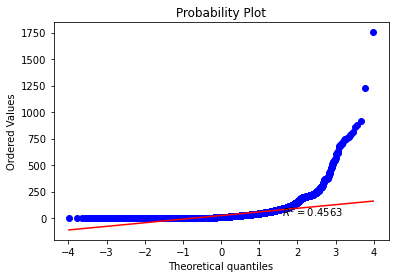

In [89]:
fig, ax = plt.subplots()

ax = scipy.stats.probplot(df_new_old_ts['minutes'], plot=plt, rvalue=True)

Отклоняем нулевую гипотезу (данные взяты не из нормального распределения)

Проверка на гомогенность дисперсии (т.к. данные не имеют нормальное распределение, то нужно использовать тест Левена) (0 гипотеза: дисперсии равны)

In [90]:
df_new_old_ts_pivoted = df_new_old_ts.pivot(columns='new_old', values='minutes')

In [91]:
scipy.stats.levene(df_new_old_ts_pivoted['new'].dropna(), df_new_old_ts_pivoted['old'].dropna()) 

LeveneResult(statistic=4.388076742497436, pvalue=0.03620313167520565)

Оклоняем нулевую гипотезу, дисперсии не равны

Стоит использовать непараметрический критерий

In [92]:
scipy.stats.mannwhitneyu(df_new_old_ts_pivoted['new'].dropna(), df_new_old_ts_pivoted['old'].dropna())

MannwhitneyuResult(statistic=10890846.0, pvalue=0.00809880404476622)

Отклоняем нулевую гипотезу о равенстве медианных значений между новыми и старыми сотрудниками на второй неделе

Отсюда вывод, что проблема, состоящая в том, что новые сотрудники выполняют таски дольше, оправдана.  
Но выполнять они их могут дольше :  
1) либо из-за своей компетентности  
2) либо из-за самих по себе сложных ресурсозатраных задач, которые даются новым сотрудникам сложно  
3) либо, т.к. это новые сотрудники, они старались более тщательно выполнять задачи, а значит и дольше, то есть у них должен быть больший процент выполненных задач 

1)

Проверить компетентность с помощью данных не получится, а вот все остальное можно

2)

Посмотрю как отличается то, как быстро выполняют старые и новые сотрудники задачи

In [93]:
df_old_workers_ts_builds = df_old_workers_ts['build_name'].value_counts()\
                     .to_frame()\
                     .reset_index().rename(columns={'build_name':'count_old',
                                                    'index':'build_name'})\
                     .merge(df_old_workers_ts.groupby('build_name')['minutes'].sum().to_frame().reset_index(), on='build_name')\
                     .sort_values(by='minutes', ascending=False)

In [94]:
df_new_workers_ts_builds = df_new_workers_ts['build_name'].value_counts()\
                     .to_frame()\
                     .reset_index().rename(columns={'build_name':'count_new',
                                                    'index':'build_name'})\
                     .merge(df_new_workers_ts.groupby('build_name')['minutes'].sum().to_frame().reset_index(), on='build_name')\
                     .sort_values(by='minutes', ascending=False)

In [95]:
df_old_workers_ts_builds.shape[0]

46

In [96]:
df_new_workers_ts_builds.shape[0]

30

Судя по количеству уникальных задач, для новых работников были поручены не все уникальные задачи. Буду использовать только те задачи, которые выполнялись как старыми, так и новыми сотрудниками

In [97]:
df_old_new_ts_builds = df_old_workers_ts_builds.merge(df_new_workers_ts_builds, how='inner', on='build_name', suffixes=('_old', '_new'))

In [98]:
df_old_new_ts_builds

,build_name,count_old,minutes_old,count_new,minutes_new
0,build_cyan_executable,5147,153882.750917,360,7635.323167
1,build_cyan_texture,2346,60786.589400,113,2154.066567
2,validate_green_executable,4527,57820.519367,81,2884.435933
3,build_yellow_sound,1611,56248.182917,65,2190.521967
4,deploy_cyan_texture,745,29945.871133,50,1844.907650
5,validate_blue_executable,988,27978.987667,83,1328.065583
6,test_red_data,581,23214.000183,28,890.413683
7,test_green_data,532,21247.440033,36,745.089733
8,build_green_data,238,13865.304850,17,511.324650
9,build_red_sound,370,12743.826050,12,371.121133


Посмотрю временя выполнения каждой задачи для новых и старых сотрудников

In [99]:
df_old_new_ts_builds['task_time_old'] = df_old_new_ts_builds['minutes_old']/df_old_new_ts_builds['count_old']

In [100]:
df_old_new_ts_builds['task_time_new'] = df_old_new_ts_builds['minutes_new']/df_old_new_ts_builds['count_new']

In [101]:
df_old_new_ts_builds

,build_name,count_old,minutes_old,count_new,minutes_new,task_time_old,task_time_new
0,build_cyan_executable,5147,153882.750917,360,7635.323167,29.897562,21.209231
1,build_cyan_texture,2346,60786.589400,113,2154.066567,25.910737,19.062536
2,validate_green_executable,4527,57820.519367,81,2884.435933,12.772370,35.610320
3,build_yellow_sound,1611,56248.182917,65,2190.521967,34.915073,33.700338
4,deploy_cyan_texture,745,29945.871133,50,1844.907650,40.195800,36.898153
5,validate_blue_executable,988,27978.987667,83,1328.065583,28.318813,16.000790
6,test_red_data,581,23214.000183,28,890.413683,39.955250,31.800489
7,test_green_data,532,21247.440033,36,745.089733,39.938797,20.696937
8,build_green_data,238,13865.304850,17,511.324650,58.257583,30.077921
9,build_red_sound,370,12743.826050,12,371.121133,34.442773,30.926761


Отсюда видно, что какие-то виды тасок новые сотрудники стали выполнять быстрее, какие-то медленне

Проверю есть ли статистически значимые различия между медианными значениями для всех задач, выполненными как старыми, так и новыми сотрудниками  
Нулевая гипотеза: различий в медианных значениях нет; альфа=0.05

In [102]:
scipy.stats.mannwhitneyu(df_old_new_ts_builds['task_time_old'], df_old_new_ts_builds['task_time_new'])

MannwhitneyuResult(statistic=465.0, pvalue=0.49381284805148606)

Нулевая гипотеза отвергается, можно сказать, что медианно новые сотрудники выполняют сами задачи не так, как старые сотрудники

3)

Посмотрю на соотношение классов относительно статуса таски

Text(0.5, 1.0, 'new workers')

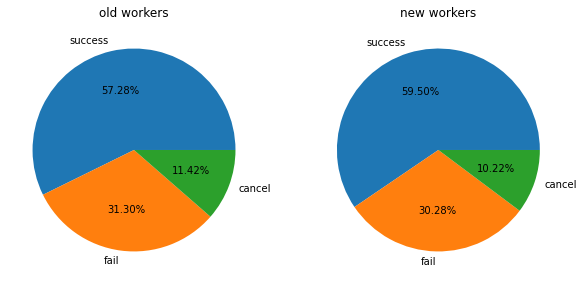

In [103]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].pie(df_old_workers_ts['status'].value_counts(), labels=df_old_workers_ts['status'].value_counts().index, autopct='%.2f%%')
ax[1].pie(df_new_workers_ts['status'].value_counts(), labels=df_new_workers_ts['status'].value_counts().index, autopct='%.2f%%')

ax[0].set_title('old workers')
ax[1].set_title('new workers')

Как можно заметить, соотношение можно назвать схожим, это говорит о том, что новые сотрудники в примерно таком же соотношении успешно выполняют, отмененяют, и не выполненяют таски

Но нужно узнать сколько они тратят времени на успешное выполнение таски

In [104]:
df_old_workers_ts[df_old_workers_ts['status']=='success']['minutes'].median()

8.8474

In [105]:
df_new_workers_ts[df_new_workers_ts['status']=='success']['minutes'].median()

9.0842

Проверю есть ли статистически значимая разница в медианных значениях для старых и новых сотрудников, которые успешно выполнили таски  
Нулевая гипотеза: разницы в медианах двух групп нет; альфа=0.05

In [106]:
scipy.stats.mannwhitneyu(df_old_workers_ts[df_old_workers_ts['status']=='success']['minutes'], df_new_workers_ts[df_new_workers_ts['status']=='success']['minutes'])

MannwhitneyuResult(statistic=3387813.0, pvalue=0.07001739440564002)

Принимаем нулевую гипотезу, нет разницы в медиане между старыми и новыми сотрудниками, успешно выполнившими таски. Можно сказать, что хоть и новые работники медианно тратят больше времени на успешное выполнение таски, но это не является статистически значимым

Из всего этого можно сделать вывод, что статистически значимая разница между новыми и старыми сотрудниками может объясняеться как тем, что сотрудники, которые появились на второй неделе хуже выполняют конкретные задачи относительно сотрудников, которые уже были в первой неделе, так и иными факторами, которые не доказать через имеющиеся данные

### 2

Посмотрю на медианные значения затраченных ресурсов сотрудниками, которые были и на первой, и на второй неделе

In [107]:
df1w_ts['minutes'].median()

5.874116666666667

In [108]:
df_old_workers_ts['minutes'].median()

8.583675

Проверю является ли эта разница статистически значимой  
Нулевая гипотеза: разницы в медианах затраченных ресурсов между одними и теми же сотрудниками на 1 и 2 недели нет; альфа=0.05

In [109]:
scipy.stats.mannwhitneyu(df1w_ts['minutes'], df_old_workers_ts['minutes'])

MannwhitneyuResult(statistic=166806485.5, pvalue=5.631445090500635e-60)

Нулевую гипотезу можно отвергнуть, разница в медианных значениях этих групп есть.  
Отсюда вывод, что одни и те же сотрудники стали выполнять задачи дольше.  
Это может быть по ряду причин:
1) ушли сотрудники, которые оказывали сильное влияние на быстрое решение задач  
2) задачи для сотрудников стали сложнее, либо добавились новые сложные задачи  
3) сотрудники стали тщательнее выполнять задачи  
4) иные факторы

1)

Вопрос про ушедших сотрудников можно закрыть, т.к. выше я показал, что ушел один сотрудник, вдобавок, он выполнял задачи медленне большинства

2)

Посмотрю как быстро выполняют одни и те же сотрудники задачи в первую и вторую недели

In [110]:
df_builds_before_ts = df1w_ts['build_name'].value_counts()\
                                            .to_frame()\
                                            .reset_index().rename(columns={'index':'build_name',
                                                                           'build_name':'count_before'})\
                                            .merge(df1w_ts.groupby('build_name')['minutes'].sum().to_frame().reset_index(), on='build_name')\
                                            .sort_values(by='minutes', ascending=False)

In [111]:
df_builds_after_ts = df_old_workers_ts['build_name'].value_counts()\
                                            .to_frame()\
                                            .reset_index().rename(columns={'index':'build_name',
                                                                           'build_name':'count_after'})\
                                            .merge(df_old_workers_ts.groupby('build_name')['minutes'].sum().to_frame().reset_index(), on='build_name')\
                                            .sort_values(by='minutes', ascending=False)

In [112]:
df_builds_b_a_ts = df_builds_before_ts.merge(df_builds_after_ts, how='outer', on='build_name', suffixes=('_before', '_after'))

In [113]:
df_builds_b_a_ts

,build_name,count_before,minutes_before,count_after,minutes_after
0,build_cyan_executable,3987.0,99465.313000,5147.0,153882.750917
1,build_cyan_texture,2768.0,58647.380383,2346.0,60786.589400
2,validate_green_executable,4002.0,32675.966450,4527.0,57820.519367
3,deploy_cyan_texture,1062.0,29908.416133,745.0,29945.871133
4,build_yellow_sound,1770.0,23270.168283,1611.0,56248.182917
5,test_red_data,623.0,22505.915317,581.0,23214.000183
6,validate_blue_executable,827.0,17697.177750,988.0,27978.987667
7,build_green_data,269.0,14810.915500,238.0,13865.304850
8,test_green_data,340.0,10191.998850,532.0,21247.440033
9,build_yellow_data,179.0,7297.802450,40.0,2414.303800


Как видно, во второй неделе как появились новые уникальные задачи, так и не было задач, которые были в первой неделе.  
Посмотрю какое процентное соотношение вносят задачи, которые появились на второй неделе

In [114]:
(df_builds_b_a_ts.loc[df_builds_b_a_ts['count_before'].isna()]['minutes_after'].sum()/df_builds_b_a_ts['minutes_after'].sum())*100

0.35107922311342055

Это значение является процентным соотношением суммы затраченных ресурсов на задачи, которые появились во второй неделе относительно суммы затраченных ресурсов на задачи в целом для одних и тех же сотрудников. Оно является очень маленьким, поэтому можно убрать их 

Теперь посмотрю то же самое, только для задач, которых не было на второй неделе

In [115]:
(df_builds_b_a_ts.loc[df_builds_b_a_ts['count_after'].isna()]['minutes_before'].sum()/df_builds_b_a_ts['minutes_before'].sum())*100

0.005580960111232822

Оно еще меньше, тоже можно убрать

In [116]:
df_builds_b_a_ts.dropna(inplace=True)

Посмотрю время выполнения одной и той же задачи в первую и во вторую неделю одними и теми же сотрудниками

In [117]:
df_builds_b_a_ts['task_time_before'] = df_builds_b_a_ts['minutes_before']/df_builds_b_a_ts['count_before']

In [118]:
df_builds_b_a_ts['task_time_after'] = df_builds_b_a_ts['minutes_after']/df_builds_b_a_ts['count_after']

In [119]:
df_builds_b_a_ts

,build_name,count_before,minutes_before,count_after,minutes_after,task_time_before,task_time_after
0,build_cyan_executable,3987.0,99465.313000,5147.0,153882.750917,24.947407,29.897562
1,build_cyan_texture,2768.0,58647.380383,2346.0,60786.589400,21.187637,25.910737
2,validate_green_executable,4002.0,32675.966450,4527.0,57820.519367,8.164909,12.772370
3,deploy_cyan_texture,1062.0,29908.416133,745.0,29945.871133,28.162350,40.195800
4,build_yellow_sound,1770.0,23270.168283,1611.0,56248.182917,13.146988,34.915073
5,test_red_data,623.0,22505.915317,581.0,23214.000183,36.125065,39.955250
6,validate_blue_executable,827.0,17697.177750,988.0,27978.987667,21.399248,28.318813
7,build_green_data,269.0,14810.915500,238.0,13865.304850,55.059165,58.257583
8,test_green_data,340.0,10191.998850,532.0,21247.440033,29.976467,39.938797
9,build_yellow_data,179.0,7297.802450,40.0,2414.303800,40.769846,60.357595


Проверю различается ли статистически время выполнения одной задачи теми же сотрудниками в первую и во вторую неделю.  
Нулевая гипотеза: нет разницы в медианных значениях между групп; альфа=0.05

In [120]:
scipy.stats.mannwhitneyu(df_builds_b_a_ts['task_time_before'], df_builds_b_a_ts['task_time_after'])

MannwhitneyuResult(statistic=735.0, pvalue=0.33017005193778604)

Принимаем нулевую гипотезу, можно сказать, что одни и те же задачи сотрудники выполняют одинаково (не учитывая то, что один сотрудник мог выполнять одну и ту же задачу либо медленне, либо быстрее)

3)

Проверю соотношение классов статуса задачи для одних и тех же сотрудников на первой неделе и на второй

Text(0.5, 1.0, 'same workers on the 2nd week')

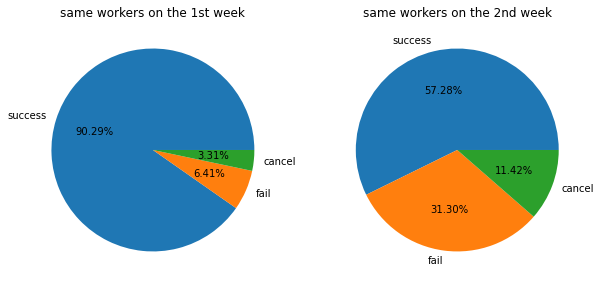

In [121]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].pie(df1w_ts['status'].value_counts(), labels=df1w_ts['status'].value_counts().index, autopct='%.2f%%')
ax[1].pie(df_old_workers_ts['status'].value_counts(), labels=df_old_workers_ts['status'].value_counts().index, autopct='%.2f%%')

ax[0].set_title('same workers on the 1st week')
ax[1].set_title('same workers on the 2nd week')

Как видно из графика, те же работники стали меньше успешно выполнять таски

Стоит проверить, различается ли время успешного выполнения таски, потому что такии различия в соотношениях классов могут быть из-за того, что на второй неделе те же сотрудники стремились быстрее выполнять задачи, и поэтому количество успешно выполненых уменьшилось

In [122]:
df1w_ts[df1w_ts['status']=='success']['minutes'].median()

5.74515

In [123]:
df_old_workers_ts[df_old_workers_ts['status']=='success']['minutes'].median()

8.8474

Нулевая гипотеза: нет разницы в медианном значении затраченного времени, при том, что таска была успешно выполнена; альфа=0.05

In [124]:
scipy.stats.mannwhitneyu(df1w_ts[df1w_ts['status']=='success']['minutes'], df_old_workers_ts[df_old_workers_ts['status']=='success']['minutes'])

MannwhitneyuResult(statistic=85627601.5, pvalue=9.586464550728863e-49)

Отклоняем нулевую гипотезу. Мое предположение тоже опровергается, т.к. медианное время для тех же работников во вторую неделю наоборот больше. Можно сказать, что, действительно, сотрудники успешно выполняют таски дольше. То же самое можно проверить и с другими статусами таски

Для статуса fail

In [125]:
scipy.stats.mannwhitneyu(df1w_ts[df1w_ts['status']=='fail']['minutes'], df_old_workers_ts[df_old_workers_ts['status']=='fail']['minutes'])

MannwhitneyuResult(statistic=3323008.0, pvalue=2.0961359403246863e-08)

Отклоняем нулевую гипотезу

Для статуса cancel

In [126]:
scipy.stats.mannwhitneyu(df1w_ts[df1w_ts['status']=='cancel']['minutes'], df_old_workers_ts[df_old_workers_ts['status']=='cancel']['minutes'])

MannwhitneyuResult(statistic=747673.5, pvalue=0.005418619406766655)

Отклоняем нулевую гипотезу

Можно сказать, что сотрудники тратят больше ресурсов и на успешное выполние, и на не выполнение, и на отмену таски

## --------------------------------------------------------------------------------------------------------------------------------------

Исходя из всего выше, можно сделать выводы:  
Те сотрудники, которые были как в первой, так и во второй неделе стали тратить больше ресурсов на выполнение тасок, что описывается иными факторами, данных которых не имеется в датасете  
Те сотрудники, которые появились во второй неделе тратят больше ресурсов, чем сотрудники, которые уже были в первой неделе. Это объясняется тем, что для новых сотрудников сложнее даются сами задачи, а также это может быть объяснено тоже иными факторами, данных которые нет

При чем это все вдобавок к тому, что само количество тасок увеличилось

Выводы могут поменяться в зависимости от выбираемого уровня значимости, т.к. было много случаев, когда полученное в результате теста значение p-value было близко к уровню значимости, который я везде выбирал за 0.05